<a href="https://colab.research.google.com/github/nishant-jhaa/osteoarthritis-/blob/main/data_arthritis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2022-09-22 14:25:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-22 14:25:15 (95.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (512, 512)

In [6]:
dataset = "/content/drive/MyDrive/osteoarthritis/train"
walk_through_dir(dataset)

There are 2 directories and 0 images in '/content/drive/MyDrive/osteoarthritis/train'.
There are 0 directories and 1540 images in '/content/drive/MyDrive/osteoarthritis/train/Osteoarthritis'.
There are 0 directories and 810 images in '/content/drive/MyDrive/osteoarthritis/train/Normal'.


In [7]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.jpeg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [8]:
image_df

,Filepath,Label
0,/content/drive/MyDrive/osteoarthritis/train/Os...,Osteoarthritis
1,/content/drive/MyDrive/osteoarthritis/train/Os...,Osteoarthritis
2,/content/drive/MyDrive/osteoarthritis/train/Os...,Osteoarthritis
3,/content/drive/MyDrive/osteoarthritis/train/Os...,Osteoarthritis
4,/content/drive/MyDrive/osteoarthritis/train/Os...,Osteoarthritis
...,...,...
2345,/content/drive/MyDrive/osteoarthritis/train/No...,Normal
2346,/content/drive/MyDrive/osteoarthritis/train/No...,Normal
2347,/content/drive/MyDrive/osteoarthritis/train/No...,Normal
2348,/content/drive/MyDrive/osteoarthritis/train/No...,Normal


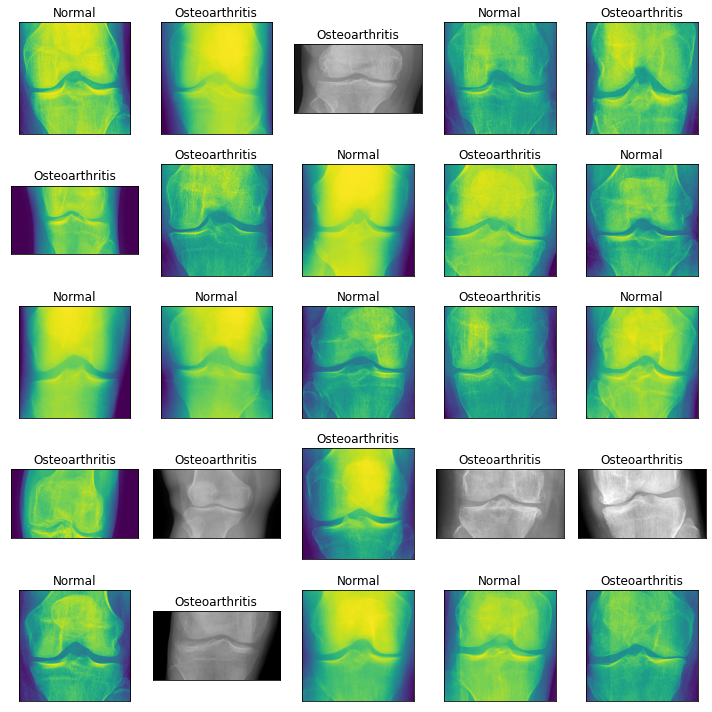

<Figure size 432x288 with 0 Axes>

In [11]:
# Display 50 pictures of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 50)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()
plt.savefig("Figure-1.jpg")